# Import The Required Libraries

In [2]:
import pandas as pd                 #data manipulation library
import numpy as np                 #scientific computing library
import matplotlib.pyplot as plt   #data visualization library
import seaborn as sns            #data visualization library
import warnings
warnings.filterwarnings('ignore')

# Link for the dataset: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university?select=RAW_global_confirmed_cases.csv


#### This is a daily updating version of COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU). The data updates every day at 6am UTC, which updates just after the raw JHU data typically updates.

In [3]:
#To import the dataset
df_covid=pd.read_csv('Downloads/RAW_global_confirmed_cases.csv')

In [4]:
#To check that what is inside this dataset
df_covid.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079


In [5]:
#to check the shape of the dataset
df_covid.shape

(279, 589)

#### Some of the colums are not helpful here, like 'Lat', 'long'

In [6]:
#to drop some columns
df_covid.drop(['Lat','Long'],axis=1,inplace=True)    #axis=0 means rows as well as axis=1 means column

In [7]:
#check
df_covid.head(10)

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,...,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
1,Albania,NaN,0,0,0,0,0,0,0,0,...,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
2,Algeria,NaN,0,0,0,0,0,0,0,0,...,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
3,Andorra,NaN,0,0,0,0,0,0,0,0,...,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
4,Angola,NaN,0,0,0,0,0,0,0,0,...,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079
5,Antigua and Barbuda,NaN,0,0,0,0,0,0,0,0,...,1421,1447,1490,1490,1540,1540,1598,1598,1598,1638
6,Argentina,NaN,0,0,0,0,0,0,0,0,...,5116803,5124963,5130852,5133831,5139966,5148085,5155079,5161926,5167733,5171458
7,Armenia,NaN,0,0,0,0,0,0,0,0,...,236234,236742,237249,237634,237885,238422,239056,239739,240261,240953
8,Australia,Australian Capital Territory,0,0,0,0,0,0,0,0,...,219,226,245,261,291,300,314,335,361,374
9,Australia,New South Wales,0,0,0,0,3,4,4,4,...,16353,17173,17995,18800,19545,20466,21471,22346,23372,24585


### Aggregate the rows by the country

In [8]:
#To get the aggregate
df_covid_aggregate = df_covid.groupby("Country/Region").sum()

In [9]:
#To chech
df_covid_aggregate.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
Albania,0,0,0,0,0,0,0,0,0,0,...,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
Algeria,0,0,0,0,0,0,0,0,0,0,...,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
Andorra,0,0,0,0,0,0,0,0,0,0,...,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
Angola,0,0,0,0,0,0,0,0,0,0,...,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,1421,1447,1490,1490,1540,1540,1598,1598,1598,1638
Argentina,0,0,0,0,0,0,0,0,0,0,...,5116803,5124963,5130852,5133831,5139966,5148085,5155079,5161926,5167733,5171458
Armenia,0,0,0,0,0,0,0,0,0,0,...,236234,236742,237249,237634,237885,238422,239056,239739,240261,240953
Australia,0,0,0,0,4,5,5,6,9,9,...,42228,43119,44026,44920,45754,46725,47840,48816,49935,51256


In [10]:
#To get the reshape
df_covid_aggregate.shape

(195, 585)

## Visualizing data related to a country for some countries

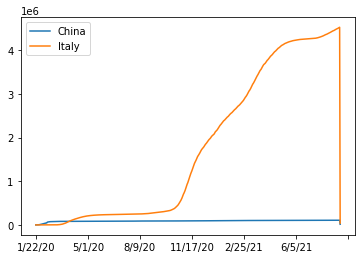

In [37]:
#For China and Italy and India
df_covid_aggregate.loc["China"].plot()
df_covid_aggregate.loc["Italy"].plot()
plt.legend()

## Calculate a good measure

<AxesSubplot:>

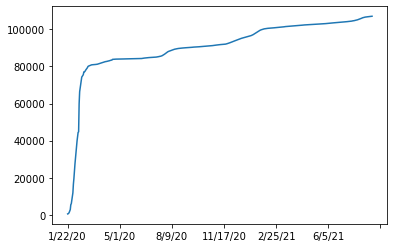

In [12]:
#Checking for China
df_covid_aggregate.loc["China"].plot()

<AxesSubplot:>

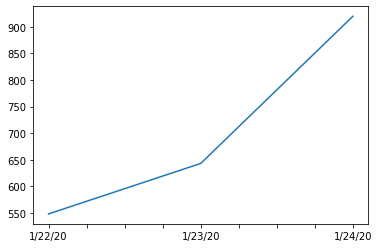

In [13]:
#to plot first three days of the pandamic in China
df_covid_aggregate.loc['China'][:3].plot()

#### Calculate and Plot the first derivative of the curve

<AxesSubplot:>

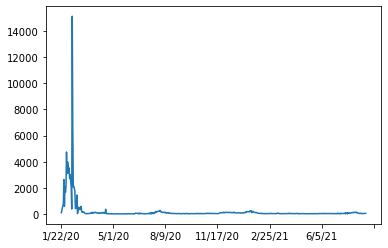

In [14]:
#to check the rate of the infection
df_covid_aggregate.loc['China'].diff().plot()

#### Find maximum infection rate of China,Italy and India

In [15]:
#For China
df_covid_aggregate.loc["China"].diff().max()

15136.0

In [16]:
#For Italy
df_covid_aggregate.loc["Italy"].diff().max()

40902.0

## To get overall maximum infections by countries

In [18]:
#To get overall Countries maximum infection 
countries=list(df_covid_aggregate.index)
max_infection_rates= []
for i in countries:
    max_infection_rates.append(df_covid_aggregate.loc[i].diff().max())
max_infection_rates

[5721.0,
 1239.0,
 1927.0,
 299.0,
 405.0,
 82.0,
 41080.0,
 2476.0,
 1321.0,
 9586.0,
 4451.0,
 527.0,
 3273.0,
 16230.0,
 207.0,
 1975.0,
 23921.0,
 1382.0,
 1838.0,
 100.0,
 7072.0,
 3755.0,
 8530.0,
 115228.0,
 387.0,
 7560.0,
 315.0,
 7083.0,
 712.0,
 491.0,
 1130.0,
 9668.0,
 10985.0,
 4044.0,
 91.0,
 13990.0,
 15136.0,
 33594.0,
 234.0,
 649.0,
 583.0,
 5992.0,
 767.0,
 4620.0,
 9907.0,
 1152.0,
 17773.0,
 4508.0,
 99.0,
 415.0,
 386.0,
 2370.0,
 11536.0,
 1774.0,
 2006.0,
 1750.0,
 282.0,
 1956.0,
 1068.0,
 2372.0,
 1854.0,
 1322.0,
 117900.0,
 595.0,
 587.0,
 6208.0,
 49044.0,
 1975.0,
 5000.0,
 36.0,
 5826.0,
 370.0,
 160.0,
 331.0,
 542.0,
 7.0,
 4043.0,
 11265.0,
 170.0,
 414188.0,
 56757.0,
 50228.0,
 13515.0,
 8227.0,
 12113.0,
 40902.0,
 1430.0,
 25892.0,
 9535.0,
 66121.0,
 2008.0,
 1.0,
 2219.0,
 4257.0,
 1993.0,
 11505.0,
 952.0,
 1861.0,
 6154.0,
 931.0,
 398.0,
 4322.0,
 62.0,
 3984.0,
 1967.0,
 7.0,
 1201.0,
 1316.0,
 24599.0,
 2194.0,
 413.0,
 510.0,
 3.0,
 401.0,

### Add this column in our dataframe

In [19]:
#To add the column in core dataset
df_covid_aggregate["max_infection_rate"]=max_infection_rates

In [20]:
df_covid_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,152448,152448,152448,152583,152660,152722,152822,152960,152960,5721.0
Albania,0,0,0,0,0,0,0,0,0,0,...,138132,138790,139324,139721,140521,141365,142253,143174,144079,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,190656,191171,191583,192089,192626,193171,193674,194186,194671,1927.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,14988,14988,14988,15002,15003,15014,15016,15025,15025,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,45583,45817,45945,46076,46340,46539,46726,46929,47079,405.0


### Create a new dataframe with only needed column

In [21]:
#To get the dataframe which is important for the analysis
covid_data=pd.DataFrame(df_covid_aggregate["max_infection_rate"])

In [22]:
#To recheck
covid_data.head()

,max_infection_rate
Country/Region,
Afghanistan,5721.0
Albania,1239.0
Algeria,1927.0
Andorra,299.0
Angola,405.0


# Import the second dataset.

In [23]:
#To import the dataset
happiness_report=pd.read_csv("Downloads/world-happiness-report-2021.csv")

In [24]:
#To better understand the data
happiness_report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [25]:
#To know the features
happiness_report.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [26]:
#To get the useless columns
useless_cols =['Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia','Generosity',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual']

In [27]:
#To drop the useless columns from the dataframe
happiness_report.drop(useless_cols,axis=1,inplace=True)

In [28]:
#To better understand the data
happiness_report.head(10)

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices
0,Finland,10.775,0.954,72.0,0.949,1.446,1.106,0.741,0.691
1,Denmark,10.933,0.954,72.7,0.946,1.502,1.108,0.763,0.686
2,Switzerland,11.117,0.942,74.4,0.919,1.566,1.079,0.816,0.653
3,Iceland,10.878,0.983,73.0,0.955,1.482,1.172,0.772,0.698
4,Netherlands,10.932,0.942,72.4,0.913,1.501,1.079,0.753,0.647
5,Norway,11.053,0.954,73.3,0.960,1.543,1.108,0.782,0.703
6,Sweden,10.867,0.934,72.7,0.945,1.478,1.062,0.763,0.685
7,Luxembourg,11.647,0.908,72.6,0.907,1.751,1.003,0.760,0.639
8,New Zealand,10.643,0.948,73.4,0.929,1.400,1.094,0.785,0.665
9,Austria,10.906,0.934,73.3,0.908,1.492,1.062,0.782,0.640


In [29]:
#change the indices of the dataframe
happiness_report.set_index("Country name",inplace=True)

In [30]:
#To recheck
happiness_report

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices
Country name,,,,,,,,
Finland,10.775,0.954,72.000,0.949,1.446,1.106,0.741,0.691
Denmark,10.933,0.954,72.700,0.946,1.502,1.108,0.763,0.686
Switzerland,11.117,0.942,74.400,0.919,1.566,1.079,0.816,0.653
Iceland,10.878,0.983,73.000,0.955,1.482,1.172,0.772,0.698
Netherlands,10.932,0.942,72.400,0.913,1.501,1.079,0.753,0.647
...,...,...,...,...,...,...,...,...
Lesotho,7.926,0.787,48.700,0.715,0.451,0.731,0.007,0.405
Botswana,9.782,0.784,59.269,0.824,1.099,0.724,0.340,0.539
Rwanda,7.676,0.552,61.400,0.897,0.364,0.202,0.407,0.627


# JOIN THE TWO DATASETS

In [31]:
#To get new dataframe
data=covid_data.join(happiness_report,how="inner")

In [32]:
data

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices
Afghanistan,5721.0,7.695,0.463,52.493,0.382,0.370,0.000,0.126,0.000
Albania,1239.0,9.520,0.697,68.999,0.785,1.008,0.529,0.646,0.491
Algeria,1927.0,9.342,0.802,66.005,0.480,0.946,0.765,0.552,0.119
Argentina,41080.0,9.962,0.898,69.000,0.828,1.162,0.980,0.646,0.544
Armenia,2476.0,9.487,0.799,67.055,0.825,0.996,0.758,0.585,0.540
...,...,...,...,...,...,...,...,...,...
Venezuela,2436.0,9.073,0.861,66.700,0.615,0.852,0.897,0.574,0.284
Vietnam,17428.0,8.973,0.850,68.034,0.940,0.817,0.873,0.616,0.679
Yemen,174.0,7.578,0.832,57.122,0.602,0.329,0.831,0.272,0.268
Zambia,3594.0,8.145,0.708,55.809,0.782,0.528,0.552,0.231,0.487


## Correlation matrix

In [33]:
data.corr()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices
max_infection_rate,1.000000,0.103964,0.003787,0.073239,-0.087162,0.104129,0.003565,0.073409,-0.087347
Logged GDP per capita,0.103964,1.000000,0.798452,0.872090,0.456510,1.000000,0.798284,0.872121,0.456511
Social support,0.003787,0.798452,1.000000,0.748850,0.486266,0.798443,0.999996,0.748902,0.486264
Healthy life expectancy,0.073239,0.872090,0.748850,1.000000,0.493911,0.872070,0.748735,0.999999,0.493926
Freedom to make life choices,-0.087162,0.456510,0.486266,0.493911,1.000000,0.456542,0.486443,0.493884,0.999994
Explained by: Log GDP per capita,0.104129,1.000000,0.798443,0.872070,0.456542,1.000000,0.798275,0.872102,0.456543
Explained by: Social support,0.003565,0.798284,0.999996,0.748735,0.486443,0.798275,1.000000,0.748788,0.486441
Explained by: Healthy life expectancy,0.073409,0.872121,0.748902,0.999999,0.493884,0.872102,0.748788,1.000000,0.493899
Explained by: Freedom to make life choices,-0.087347,0.456511,0.486264,0.493926,0.999994,0.456543,0.486441,0.493899,1.000000


### Visualize the new dataframe

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max_infection_rate'>

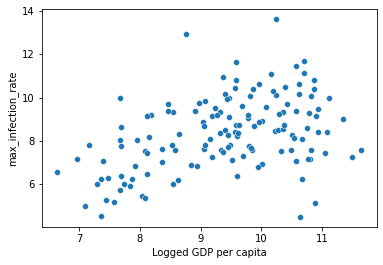

In [34]:
#To get scatterplot 
x=data["Logged GDP per capita"]
y=data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max_infection_rate'>

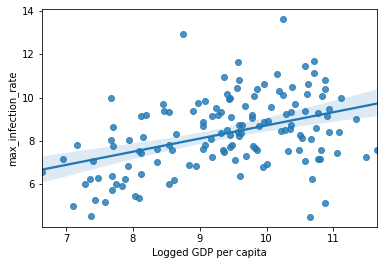

In [35]:
#To better understand the scatterplot
sns.regplot(x,np.log(y))

### Result: By the above analysis we can see that the as the GDP is increasing, Covid-19 cases also increasing. We can say that more developed countries are seeing more number of covid-19 cases.